# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [42]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [44]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

���⥬� �� 㤠���� ���� 㪠����� ����.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
���⥬� �� 㤠���� ���� 㪠����� ����.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
���⥬� �� 㤠���� ���� 㪠����� ����.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [45]:
data = pd.read_csv('./train.csv')

In [46]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [47]:
# Случайные 7 строчек из датасета
data.sample(n=7)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
126,7,19.45,136.75,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1264,59,111.35,6519.75,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
4910,1,95.60,95.6,Female,0,No,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1784,65,24.75,1715.1,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
1527,32,109.55,3608,Female,0,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
4746,18,95.15,1779.95,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,1
460,70,25.15,1940.85,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0


In [48]:
# Вычислим количество NAN'ов в каждом столбце:
display(data.isna().sum())
# И суммарное количество NAN'ов
print(30 * "-", "\nTotal: ", data.isna().sum().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

------------------------------ 
Total:  0


In [49]:
# В TotalSpent есть пустые значения " ", их необходимо обработать
tmp = data[data["TotalSpent"] == " "]
display(len(tmp))
tmp.head()

9

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [50]:
data["TotalSpent"] = data['TotalSpent'].replace(' ', 0).astype(float)

In [51]:
len(data[data["TotalSpent"] == " "])

0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

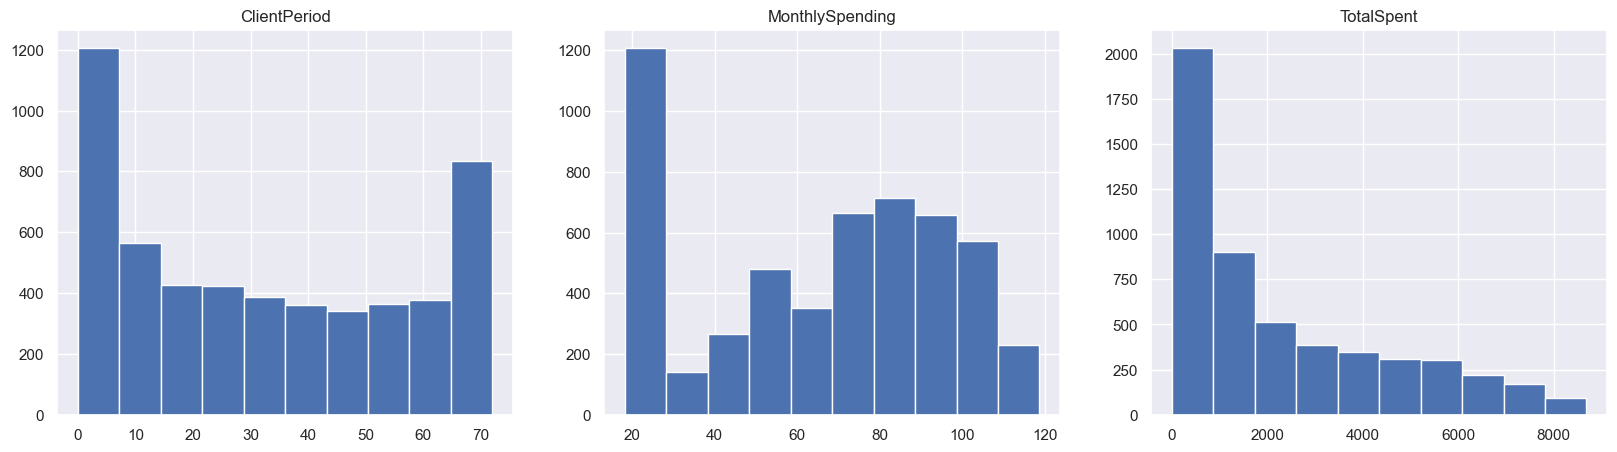

In [52]:
# Распределение численных признаков
fig = plt.figure(figsize=(20, 5))
axs = fig.subplots(1, 3)

for ind, feature in enumerate(num_cols):
    axs[ind].hist(data[feature])
    axs[ind].set_title(feature)

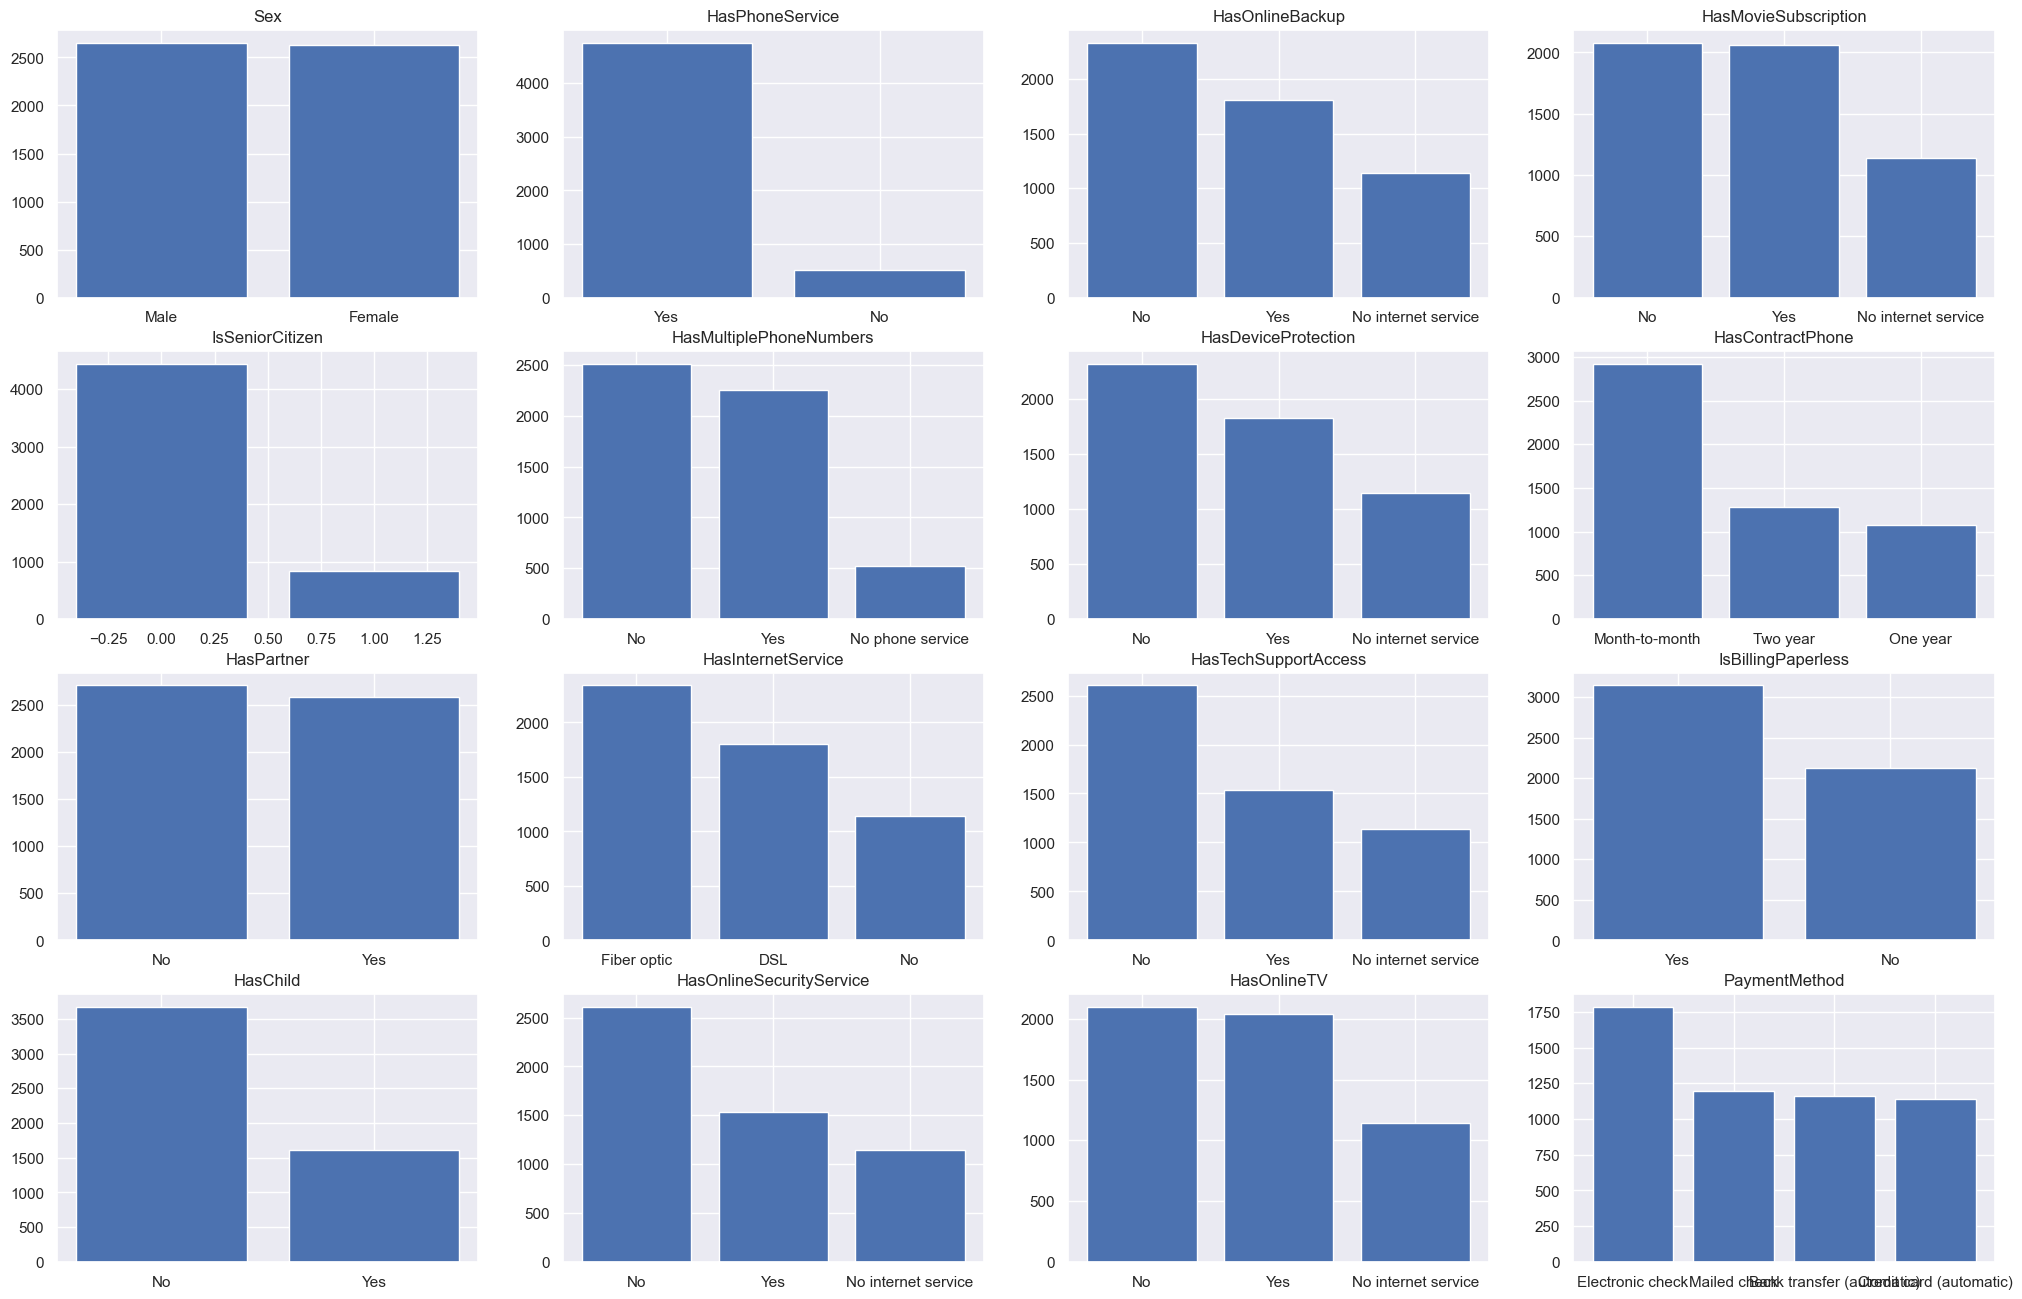

In [53]:
# Распределение категориальных признаков
fig = plt.figure(figsize=(25, 16))
axs = fig.subplots(4, 4)
x, y = 0, 0

for ind, col in enumerate(cat_cols):
    x = ind % 4
    y = ind // 4
    cat_data = data[col].value_counts()
    key = cat_data.keys()
    val = cat_data.values
    axs[x, y].bar(key, val)
    axs[x, y].set_title(col)

plt.show()


0    3898
1    1384
Name: Churn, dtype: int64


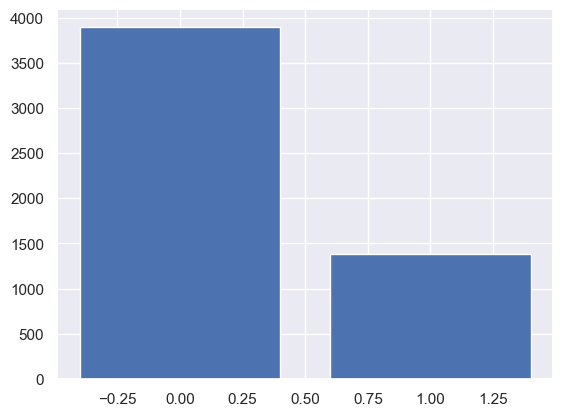

In [54]:
# Распределение целевой переменной
target_data_graph = data[target_col].value_counts()
print(target_data_graph)
plt.bar(target_data_graph.keys(), target_data_graph.values)
plt.show()

Из полученного графика видно, что количество элементов нулевого класса в 2.8 раз больше, чем первого. Следовательно, классы являются слабо сбалансированными, но это не критическая проблема

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [55]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [57]:
# Разбиваем на фичи/ответы
X = data.drop(columns=target_col, inplace=False)
y = data[target_col]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [58]:


X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [59]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,1,0,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.90,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570.00,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [17]:
# Нормировка данных
pca = StandardScaler()
X = pca.fit_transform(X)

In [18]:
# Разделяем выборку на тренировочную/тестовую части 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# Обучаем модель с разными параметрами C
log_reg_gscv = GridSearchCV(LogisticRegression(), 
                               [{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
                               cv=5,
                               n_jobs=8)
log_reg_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01, 0.001]}])

In [20]:
# Наилучшее качетсво достигается при С = 100
print(log_reg_gscv.best_params_)

{'C': 0.01}


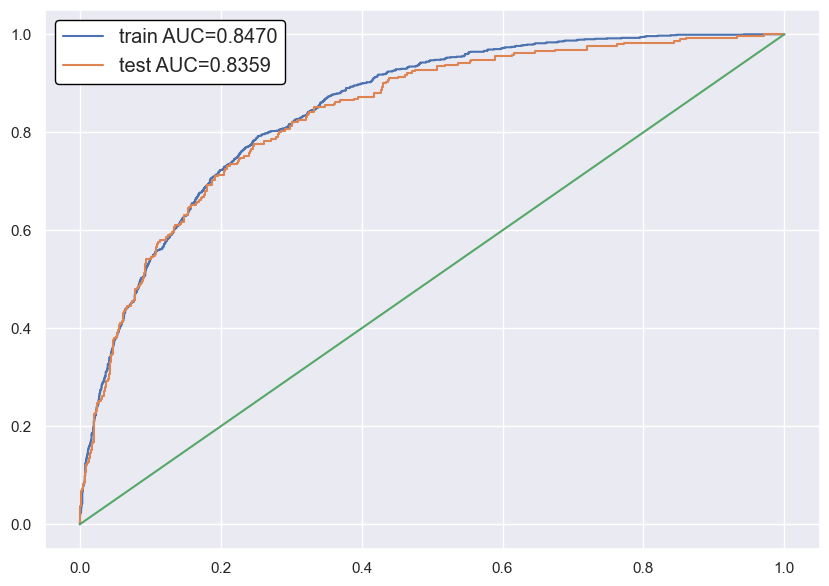

In [21]:
# Строим ROC-AUC кривую, чтобы оценить качетсво модели
y_train_pred = log_reg_gscv.predict_proba(X_train)[:, 1]
y_test_pred = log_reg_gscv.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

По метрике ROC-AUC лучшее качетсо, которого удалось достичь: 0.51. С параметром "С"=1

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [22]:
# !pip install catboost

In [23]:
from catboost import CatBoostClassifier

In [36]:
# Загружаем данные заново и чистим 
data = pd.read_csv('./train.csv')

data["TotalSpent"] = data['TotalSpent'].replace(' ', 0).astype(float)

X = data.drop(columns=target_col, inplace=False)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Обучаем модель
catboost_clf = CatBoostClassifier(
    # iterations=1200, 
    # learning_rate=0.05, 
    custom_loss=['AUC'],
    # depth=7,
    loss_function='CrossEntropy'
)


catboost_clf.fit(X_train, y_train, 
        cat_features=cat_cols, 
        eval_set=(X_test, y_test), 
        verbose=False,
        plot=True,
        # use_best_model=True
)

print('CatBoost model is fitted: ' + str(catboost_clf.is_fitted()))
print('CatBoost model parameters:')
print(catboost_clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost model is fitted: True
CatBoost model parameters:
{'loss_function': 'CrossEntropy', 'custom_loss': ['AUC']}


Получившиеся модели +-одинаковы по скору (по метрике ROC-AUC)

In [38]:
catboost_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'CrossEntropy',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderTyp

# Предсказания

In [39]:
# Берём лучшую модель
best_model = catboost_clf

In [40]:
# Обработка данных, с которыми работает модель
X_test = pd.read_csv('./test.csv')

X_test["TotalSpent"] = X_test['TotalSpent'].replace(' ', 0).astype(float)
# X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
# pca = StandardScaler()
# X_test = pca.fit_transform(X_test)

submission = pd.read_csv('./submission.csv')
submission['Churn'] = 1 - best_model.predict_proba(X_test)
submission[["Id", "Churn"]].to_csv('./my_submission.csv', index=False)

In [41]:
submission.head()

,Id,Churn
0,0,0.032600
1,1,0.722984
2,2,0.645597
3,3,0.010862
4,4,0.005609
